<a href="https://colab.research.google.com/github/hisaom0419/my_python/blob/master/MGR%E7%AE%97%E5%87%BA(Tecan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pwd
%cd ./drive/MyDrive/Colab Notebooks
%ls

[Errno 2] No such file or directory: './drive/MyDrive/Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks
 20210222_mox.xlsx           Iris_plt.ipynb                Python_start.ipynb
 averaged_data_FL1.xlsx      Iris_plt_やり方2.ipynb        Sample_No.xlsx
 averaged_data_growth.xlsx   Iris_sns_基本.ipynb           Sample_sheet.xlsx
 BioPython.ipynb             Iris_sns_条件とループ.ipynb   spectra.py
 Dataframe_intro.ipynb       iris.xlsx                     Start.ipynb
 FPs_38_GR.csv               Maplotlib_intro.ipynb         Tecan_analysis.ipynb
 Growth_data2.xlsx           MGR_calc_TECAN_HM.py          test_plot.pdf
 Growth_data.xlsx            MGR.csv                       unknown-sequence.fa
 iris.csv                   'MGR算出(Tecan).ipynb'         Untitled
 iris_HM.xlsx                __pycache__/


In [ ]:
#プレートリーダーで取り込んだデータをソートする（12行 -> 8列）スクリプト。入力と出力のファイル名は自分で指定。

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
#初期設定（読み込みファイル名、出力ファイル名を決める）
In_file = 'averaged_data_growth.xlsx'
Out_file = 'FPs_38_sort.csv'
Out2_file = 'FPs_38_GR.csv'
MGR_file = 'FPs_MGR.csv'

#測定間隔（min）、GRを算出するレンジ、R2の閾値を指定
Period = 10
Range = 27
Threshold = 0.8

In [ ]:
#ここからデータ処理
df = pd.read_excel(In_file,index_col=0)

T_max = len(df.T.index) #測定数の最大値を取得
Time = np.arange(0, T_max*Period/60, Period/60) #測定間隔（hr）のリストを作成


#サンプル行の名前をリセット
df_reset = df.reset_index(drop=True) 
df_index = df_reset.index.tolist() 
new_index = (df_reset.index//12 +1) + (df_reset.index%12)*8

#8ウェルサンプルフォーマットに要素の並び替え
df_reset.index = new_index
df_sorted = df_reset.sort_index()

#測定時間（hr）を加える
df_sorted2 = df_sorted.T
df_sorted2.insert(0, 'min', Time)

df_sorted3 =df_sorted2.reset_index()

#df_sorted3.T.to_csv(Out_file)

In [ ]:
#WellごとにTimeウインドウを移動しながらGR（直線回帰の傾き=SlopeとR2を取得）、R2のThreshold以上のSlopeを返す（Threshold以下だと0.01を返す）。
#最終的なGRは測定時間間隔（Period）で割り(min-1)、便宜的に1000をかけている。

Well = 1

while Well < 97:  
    
    Time = 0
    
    while Time < T_max-Range:
        x = np.arange(Range)
        log2_OD595 = np.log2(df4.iloc[Time:Time+Range,Well].values.tolist())

        Slope = np.polyfit(x,log2_OD595,1)
        R2 = np.corrcoef(x,log2_OD595)[0][1]**2
    
        if R2 > Threshold:
            df4_out.iloc[Time,Well] = Slope[0]*1000/Period
        else:
            df4_out.iloc[Time,Well] = 0.01
    
        Time += 1
       
#    MGR.append(max(df4_out.iloc[0:T_max,Well].values.tolist()))
          
    Well += 1

print('done')

#データの書き出し

df4_out.to_csv(Out2_file)

with open('MGR.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerow(MGR)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log2
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


done


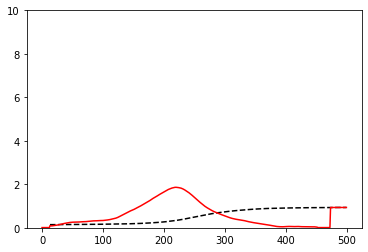

In [ ]:
#グラフで結果を確認（25のところを変更する）

Well = 10

plt.ylim(0, 10)
df4[Well].plot(color='black', linestyle ='dashed')
df4_out[Well].plot(color='red')
plt.show()